# A. Import Libraries

In [58]:
import pandas as pd
import numpy as np
import statistics
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# B. Read CSV

In [59]:
df = pd.read_csv('rideshare_kaggle.csv')
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


# C. Data Cleaning

Sebelum melakukan EDA, terlebih dahulu data akan dicek kolom apa saja yang kira-kira akan digunakan, tipe data kolomnya sudah benar atau belum, apakah ada missing value, dan apakah akan ditambah kolom yang baru.

Pertama, akan dicek kolom apa saja dan bagaimana tipe datanya pada dataset ini.

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

Pada dataset ini terdapat 57 kolom dimana ada 11 kolom dengan tipe data object. Maka akan dicek terlebih dahulu apa isi datanya didalam kolom tersebut.

In [61]:
df[list(df.select_dtypes(include='object'))].head()

,id,datetime,timezone,source,destination,cab_type,product_id,name,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,Mostly Cloudy,Rain throughout the day.,partly-cloudy-night
1,4bd23055-6827-41c6-b23b-3c491f24e74d,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,Rain,"Rain until morning, starting again in the eve...",rain
2,981a3613-77af-4620-a42a-0c0866077d1e,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,Clear,Light rain in the morning.,clear-night
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,Clear,Partly cloudy throughout the day.,clear-night
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,Partly Cloudy,Mostly cloudy throughout the day.,partly-cloudy-night


Kolom datetime akan diubah menjadi datetime, sedangkan kolom lain akan diubah menjadi tipe data category.

In [62]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [63]:
obj_col_list = df.columns[df.dtypes == 'object'].to_list()
for col in obj_col_list:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id                           693071 non-null  category      
 1   timestamp                    693071 non-null  float64       
 2   hour                         693071 non-null  int64         
 3   day                          693071 non-null  int64         
 4   month                        693071 non-null  int64         
 5   datetime                     693071 non-null  datetime64[ns]
 6   timezone                     693071 non-null  category      
 7   source                       693071 non-null  category      
 8   destination                  693071 non-null  category      
 9   cab_type                     693071 non-null  category      
 10  product_id                   693071 non-null  category      
 11  name                      

Dari hasil .info() dapat dilihat bahwa tipe data tiap kolom sudah tepat, sekarang akan dicek apakah ada missing values.

In [64]:
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Kolom price ternyata memiliki nilai null, maka akan dihapus baris yang mengandung nilai null tersebut dikarenakan nilai yang terhapus tidak terlalu banyak dibandingkan jumlah total data.

In [65]:
df.dropna(inplace=True, axis=0)

In [66]:
df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Nilai null sudah dihapus dari dataset. Sekarang akan masuk ke bagian EDA.

# D. EDA & Visualization

## Analisis Waktu Terhadap Harga
Untuk waktu akan dilakukan analisis pada hari dan jam, bulan tidak digunakan karena dataset hanya menampung data dari bulan 11 - bulan 12.

### Pengaruh Hari

**Visualisasi**

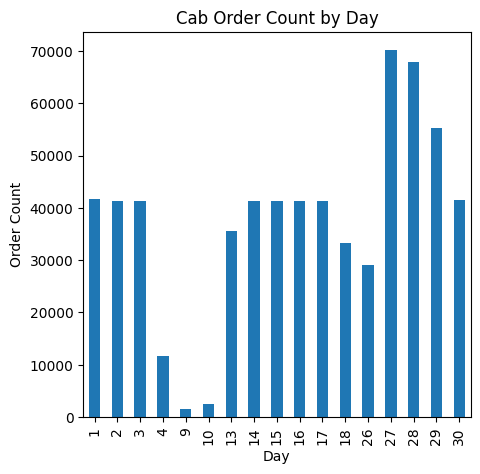

In [67]:
df_day = df.pivot_table(
    index='day',
    values='id',
    aggfunc='count'
)
df_day.rename(columns={'id':'cab order count'}, inplace=True)
df_day.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Cab Order Count by Day')
plt.ylabel('Order Count')
plt.xlabel('Day')
plt.show()

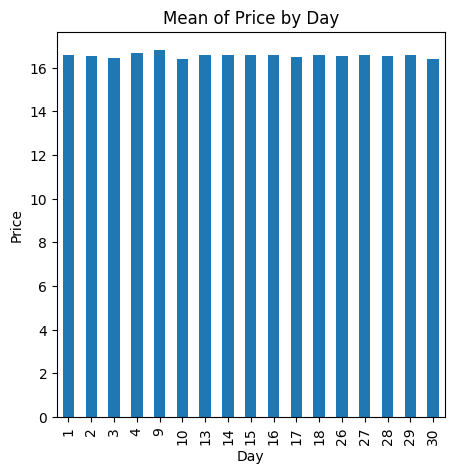

In [68]:
df_day = df.pivot_table(
    index='day',
    values='price',
    aggfunc=np.mean
)
df_day.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Mean of Price by Day')
plt.ylabel('Price')
plt.xlabel('Day')
plt.show()

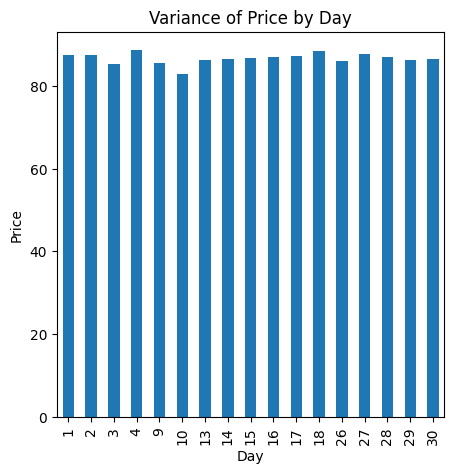

In [69]:
df_day = df.pivot_table(
    index='day',
    values='price',
    aggfunc=statistics.variance
)
df_day.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Variance of Price by Day')
plt.ylabel('Price')
plt.xlabel('Day')
plt.show()

In [70]:
df_day = df.groupby(['day'])['price']
df_day.describe()['std']

day
1     9.352676
2     9.353373
3     9.242551
4     9.414552
9     9.252346
10    9.110735
13    9.293587
14    9.302670
15    9.309548
16    9.326386
17    9.345715
18    9.410368
26    9.271219
27    9.366719
28    9.328955
29    9.294890
30    9.304620
Name: std, dtype: float64

**Kesimpulan**

1. Banyaknya gap hari seperti tidak adanya data dari tanggal 5-8, dan 19-25
2. Hasil mean bisa disimpulkan bahwa rata - rata harga untuk tiap hari memiliki nilai yang sama
3. Hasil variance dapat disimpulkan bahwa data harga cukup tersebar dari mean
4. Hasil standard deviasi juga menunjukkan hal yang serupa seperti mean

### Pengaruh Jam

**Visualisasi**

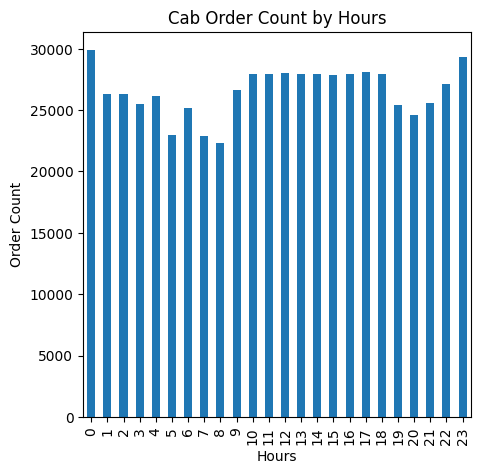

In [71]:
df_hour = df.pivot_table(
    index='hour',
    values='id',
    aggfunc='count'
)
df_hour.rename(columns={'id':'cab order count'}, inplace=True)
df_hour.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Cab Order Count by Hours')
plt.ylabel('Order Count')
plt.xlabel('Hours')
plt.show()

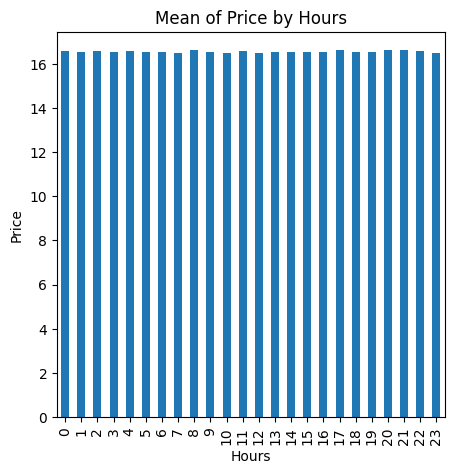

In [72]:
df_hour = df.pivot_table(
    index='hour',
    values='price',
    aggfunc='mean'
)
df_hour.rename(columns={'id':'cab order count'}, inplace=True)
df_hour.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Mean of Price by Hours')
plt.ylabel('Price')
plt.xlabel('Hours')
plt.show()

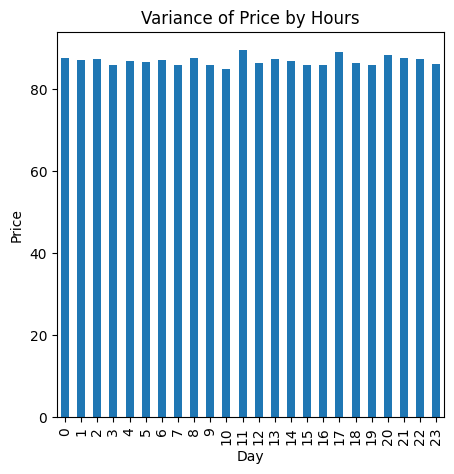

In [73]:
df_hour = df.pivot_table(
    index='hour',
    values='price',
    aggfunc=statistics.variance
)
df_hour.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Variance of Price by Hours')
plt.ylabel('Price')
plt.xlabel('Day')
plt.show()

In [74]:
df_day = df.groupby(['day'])['price']
df_day.describe()['std']

day
1     9.352676
2     9.353373
3     9.242551
4     9.414552
9     9.252346
10    9.110735
13    9.293587
14    9.302670
15    9.309548
16    9.326386
17    9.345715
18    9.410368
26    9.271219
27    9.366719
28    9.328955
29    9.294890
30    9.304620
Name: std, dtype: float64

**Kesimpulan**

Setelah dilihat, pengaruh harga berdasarkan jam memiliki kemiripan dengan pengaruh berdasarkan hari seperti mean tiap jam yang sama, variance yang sama, dan standard deviasi yang sama. Banyaknya orderan juga di tiap jam juga tidak memiliki perbedaan jumlah yang signifikan.

## Analisis Asal - Destinasi Terhadap Harga

**Visualisasi**

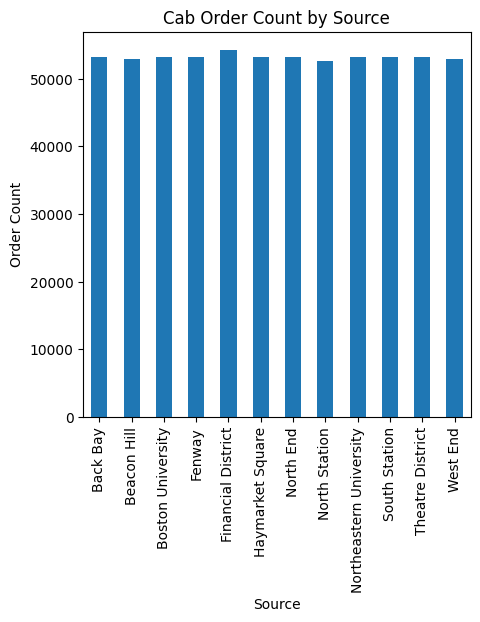

In [75]:
df_sc = df.pivot_table(
    index='source',
    values='id',
    aggfunc='count'
)
df_sc.rename(columns={'id':'cab order count'}, inplace=True)
df_sc.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Cab Order Count by Source')
plt.ylabel('Order Count')
plt.xlabel('Source')
plt.show()

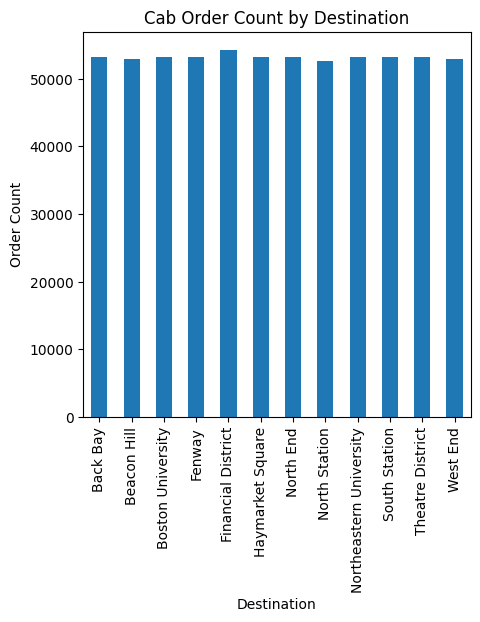

In [76]:
df_dst = df.pivot_table(
    index='source',
    values='id',
    aggfunc='count'
)
df_dst.rename(columns={'id':'cab order count'}, inplace=True)
df_dst.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Cab Order Count by Destination')
plt.ylabel('Order Count')
plt.xlabel('Destination')
plt.show()

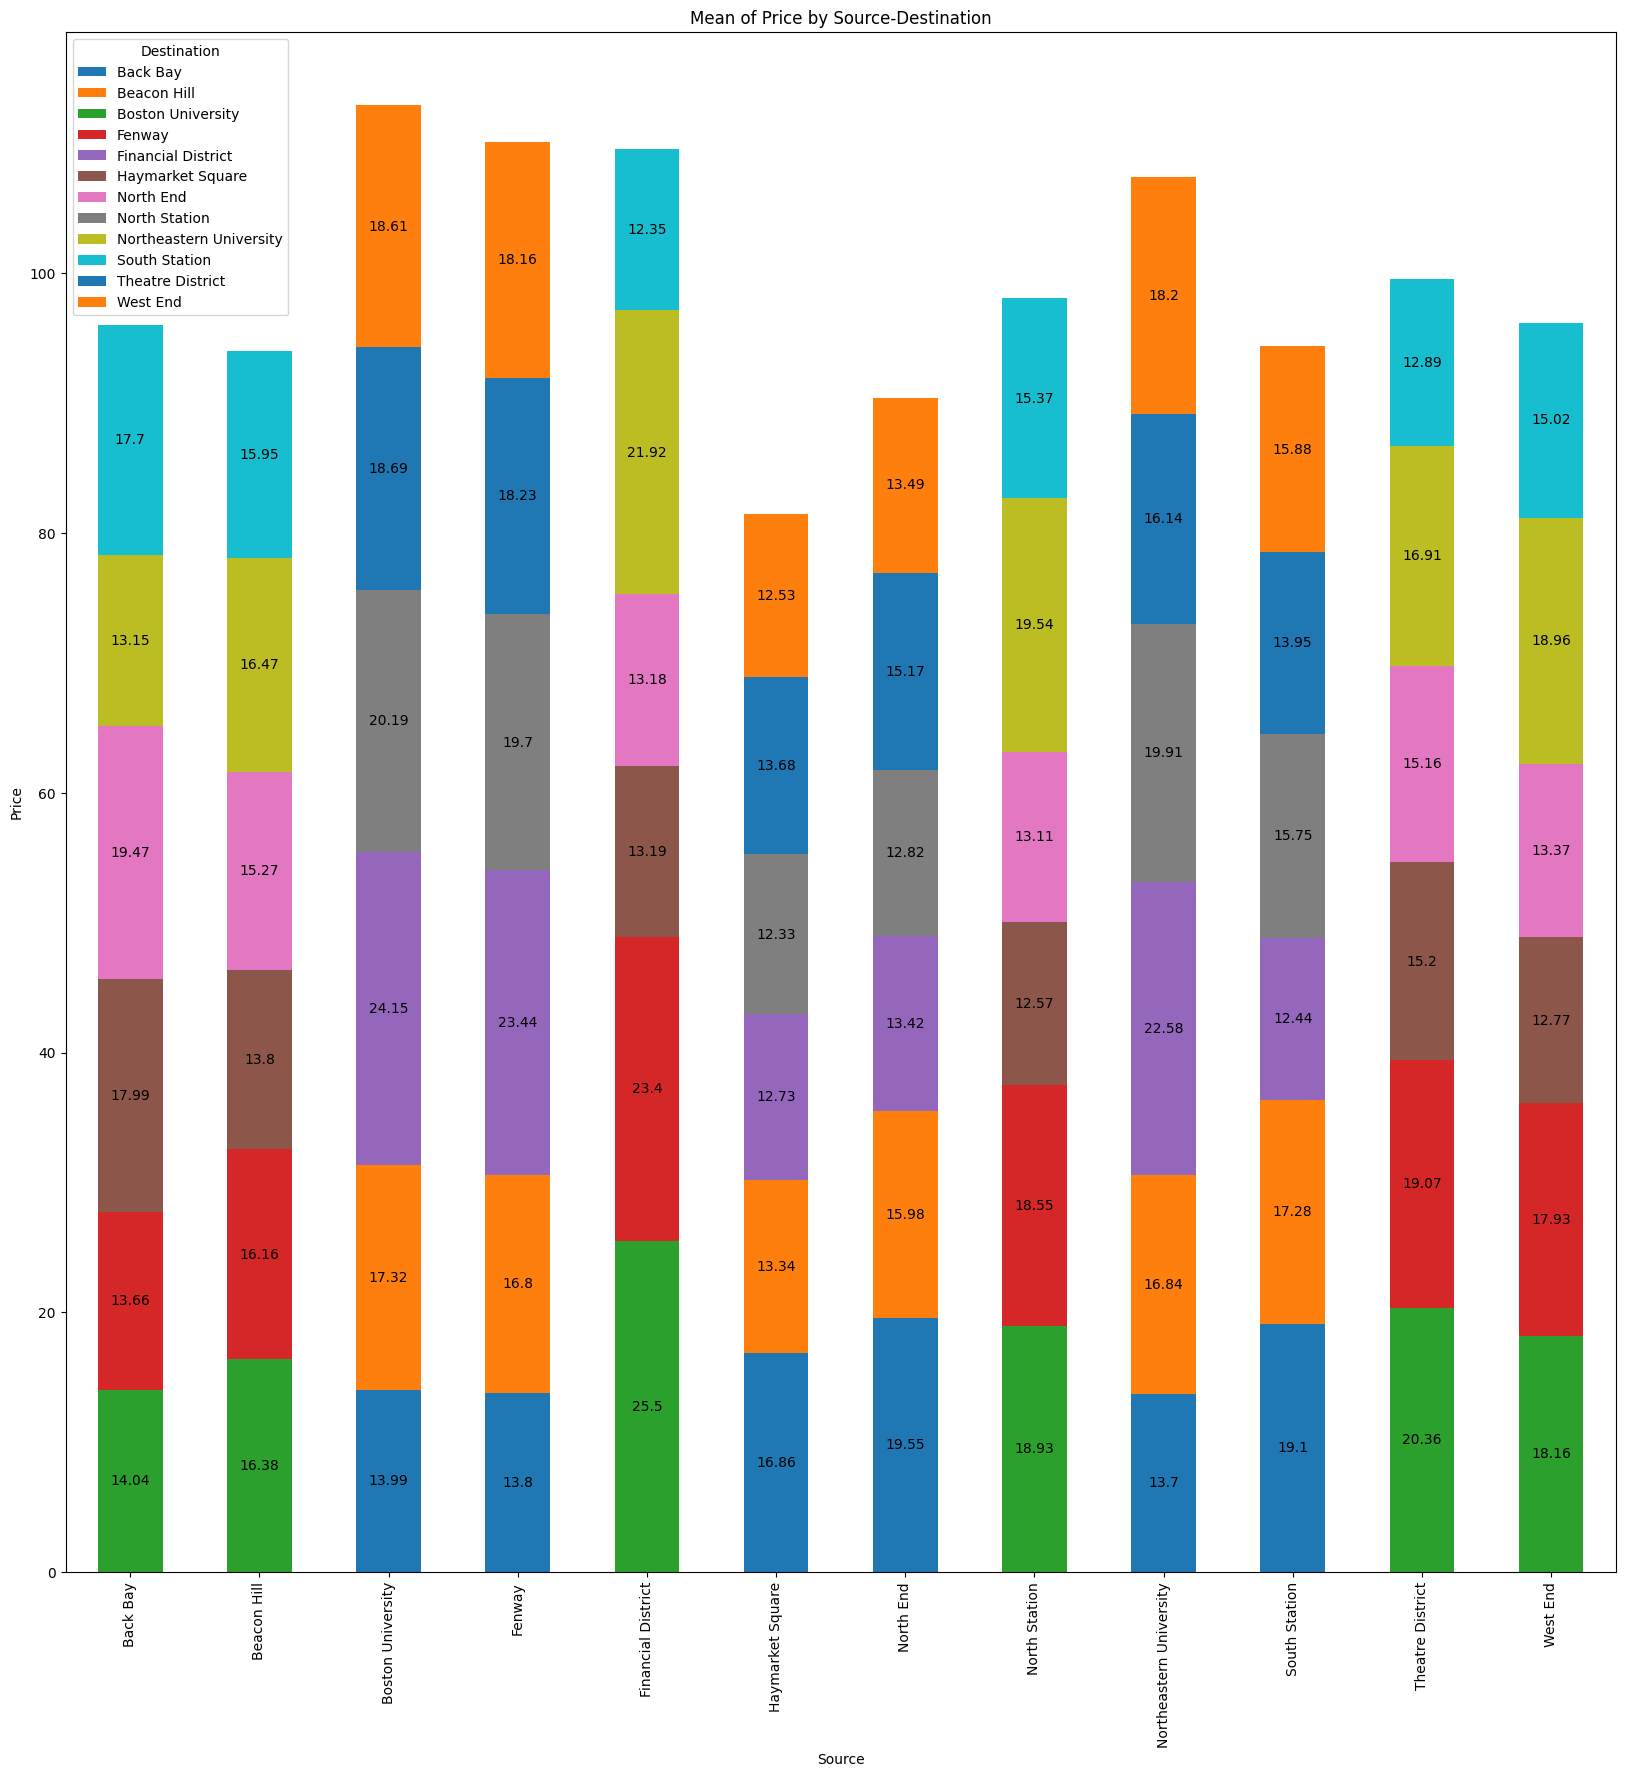

In [77]:
df_sc_dst = df.pivot_table(
    index='source',
    columns='destination',
    values='price',
    aggfunc=np.mean
)
plot = df_sc_dst.plot(kind='bar', stacked=True, figsize=(20, 20))
plt.legend(title='Destination')
plt.title('Mean of Price by Source-Destination')
plt.ylabel('Price')
plt.xlabel('Source')
for mean in plot.containers:
    labels = [round(v.get_height(),2) if v.get_height() > 0 else '' for v in mean]
    plot.bar_label(mean, labels=labels, label_type='center')
plt.show()

**Kesimpulan**

1. Jumlah pengorderan berdasarkan asal dan destinasi memiliki jumlah yang mendekati
2. Mean harga berbeda - beda berdasarkan asal-destinasi sehingga ada kemungkinan price terpengaruhi oleh hal tersebut

# Pengaruh Cab Type 

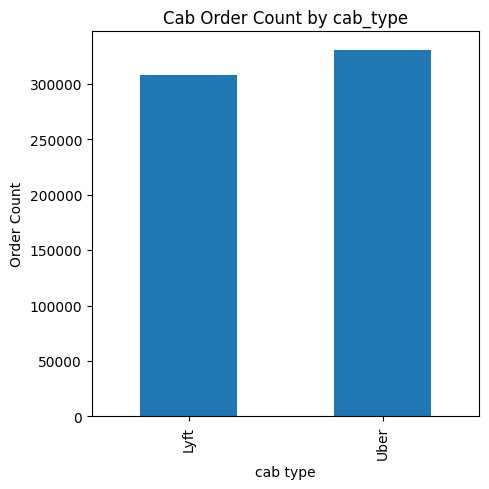

In [78]:
df_cab_type = df.pivot_table(
    index='cab_type',
    values='id',
    aggfunc='count'
)
df_cab_type.rename(columns={'id':'cab order count'}, inplace=True)
df_cab_type.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Cab Order Count by cab_type')
plt.ylabel('Order Count')
plt.xlabel('cab type')
plt.show()

In [79]:
df_day = df.groupby(['cab_type'])['price']
df_day.describe()['std']

cab_type
Lyft    10.019171
Uber     8.560300
Name: std, dtype: float64

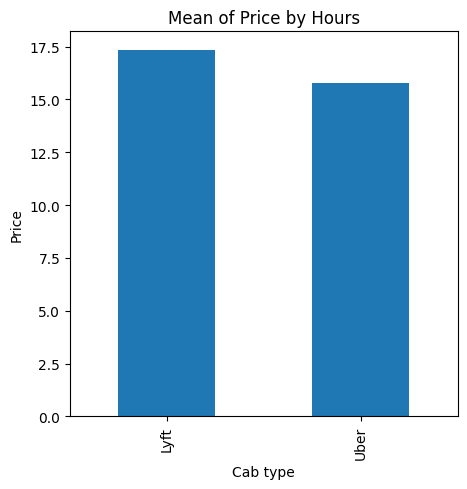

In [80]:
df_cab_type = df.pivot_table(
    index='cab_type',
    values='price',
    aggfunc='mean'
)
df_cab_type.rename(columns={'id':'cab order count'}, inplace=True)
df_cab_type.plot(kind='bar', figsize=(5, 5), legend=None)
plt.title('Mean of Price by Hours')
plt.ylabel('Price')
plt.xlabel('Cab type')
plt.show()

# Kesimpulan
Dapat dilihat bahwa order yang dipaling banyak adalah uber.Hal ini dikarenakan rata-rata harga dari type Uber lebih rendah dibandingkan type Lyft.